# Elo Rating and Age Correlation: Analyzing the Impact of Age on Chess Performance

The relationship between age and performance in chess has long intrigued enthusiasts and researchers alike. One of the most prominent metrics for evaluating a player's skill level in chess is the Elo rating system, developed by Arpad Elo. Elo ratings offer a standardized method to compare players' proficiency, dynamically updating based on their game outcomes. By analyzing the correlation between players' ages and their Elo ratings, we can gain valuable insights into how age impacts performance, identifying trends such as peak performance ages and the typical career lifespan of top players.


Correlation between age and Elo rating: 0.02


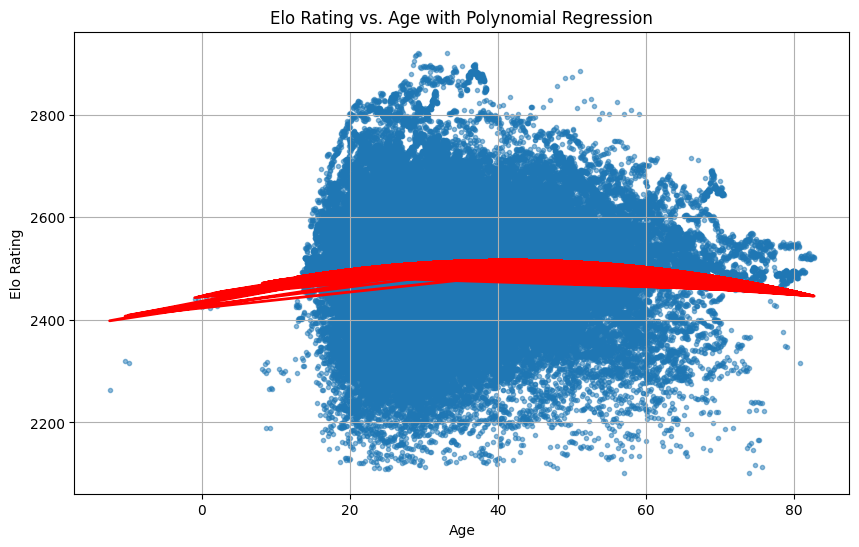

Peak performance age: 41.34 years


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Attempt to read the CSV file with a different encoding
try:
    data_df = pd.read_csv('ranking_chessplayers_1851_2001.csv', encoding='latin1')
except UnicodeDecodeError:
    print("Error: Unable to read the file with the specified encoding.")

# Ensure the 'Age' column is numeric
data_df['Age'] = pd.to_numeric(data_df['Age'], errors='coerce')

# Drop rows with missing values in 'Age' or 'Rating'
data_df = data_df.dropna(subset=['Age', 'Rating'])


# Scatter plot of Elo rating vs. Age
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Age'], data_df['Rating'], alpha=0.5, marker='.')
plt.xlabel('Age')
plt.ylabel('Elo Rating')
plt.title('Elo Rating vs. Age')
plt.grid(True)
plt.show()

# Correlation analysis
correlation, _ = pearsonr(data_df['Age'], data_df['Rating'])
print(f"Correlation between age and Elo rating: {correlation:.2f}")

# Regression analysis with polynomial features
X = data_df['Age'].values.reshape(-1, 1)
y = data_df['Rating'].values

# Transforming features to polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fitting polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predicting Elo ratings
predictions = model.predict(X_poly)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Age'], data_df['Rating'], alpha=0.5, marker='.')
plt.plot(X, predictions, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Elo Rating')
plt.title('Elo Rating vs. Age with Polynomial Regression')
plt.grid(True)
plt.show()

# Analyzing peak performance age (finding the maximum predicted rating)
peak_age_index = np.argmax(predictions)
peak_age = X[peak_age_index]
print(f"Peak performance age: {peak_age[0]:.2f} years")


